In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import imblearn
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from collections import Counter
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# N_TRAIN = int(214)
# BUFFER_SIZE = int(214)
# BATCH_SIZE = 10
# STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE

In [3]:
# lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
#   0.001,
#   decay_steps=STEPS_PER_EPOCH*1000,
#   decay_rate=1,
#   staircase=False)

# def get_optimizer():
#   return tf.keras.optimizers.Adam(lr_schedule)
#print(imblearn.__version__)

In [4]:
ds = pd.read_csv("glass.csv",
                 names=["ID", "RI", "NA2O", "MGO", "AL2O3", "SIO2", "K2O", "CAO", "BAO", "FE2O3", "TYPE"])
print(ds)
print(type(ds['TYPE']))
print(ds['TYPE'])

      ID       RI   NA2O   MGO  AL2O3   SIO2   K2O   CAO   BAO  FE2O3  TYPE
0      1  1.52101  13.64  4.49   1.10  71.78  0.06  8.75  0.00    0.0     1
1      2  1.51761  13.89  3.60   1.36  72.73  0.48  7.83  0.00    0.0     1
2      3  1.51618  13.53  3.55   1.54  72.99  0.39  7.78  0.00    0.0     1
3      4  1.51766  13.21  3.69   1.29  72.61  0.57  8.22  0.00    0.0     1
4      5  1.51742  13.27  3.62   1.24  73.08  0.55  8.07  0.00    0.0     1
..   ...      ...    ...   ...    ...    ...   ...   ...   ...    ...   ...
209  210  1.51623  14.14  0.00   2.88  72.61  0.08  9.18  1.06    0.0     7
210  211  1.51685  14.92  0.00   1.99  73.06  0.00  8.40  1.59    0.0     7
211  212  1.52065  14.36  0.00   2.02  73.42  0.00  8.44  1.64    0.0     7
212  213  1.51651  14.38  0.00   1.94  73.61  0.00  8.48  1.57    0.0     7
213  214  1.51711  14.23  0.00   2.08  73.36  0.00  8.62  1.67    0.0     7

[214 rows x 11 columns]
<class 'pandas.core.series.Series'>
0      1
1      1
2      1


In [5]:
ds['TYPE'] = ds['TYPE'].replace({1:0,2:1,3:2,5:3,6:4,7:5})
print(ds)

      ID       RI   NA2O   MGO  AL2O3   SIO2   K2O   CAO   BAO  FE2O3  TYPE
0      1  1.52101  13.64  4.49   1.10  71.78  0.06  8.75  0.00    0.0     0
1      2  1.51761  13.89  3.60   1.36  72.73  0.48  7.83  0.00    0.0     0
2      3  1.51618  13.53  3.55   1.54  72.99  0.39  7.78  0.00    0.0     0
3      4  1.51766  13.21  3.69   1.29  72.61  0.57  8.22  0.00    0.0     0
4      5  1.51742  13.27  3.62   1.24  73.08  0.55  8.07  0.00    0.0     0
..   ...      ...    ...   ...    ...    ...   ...   ...   ...    ...   ...
209  210  1.51623  14.14  0.00   2.88  72.61  0.08  9.18  1.06    0.0     5
210  211  1.51685  14.92  0.00   1.99  73.06  0.00  8.40  1.59    0.0     5
211  212  1.52065  14.36  0.00   2.02  73.42  0.00  8.44  1.64    0.0     5
212  213  1.51651  14.38  0.00   1.94  73.61  0.00  8.48  1.57    0.0     5
213  214  1.51711  14.23  0.00   2.08  73.36  0.00  8.62  1.67    0.0     5

[214 rows x 11 columns]


In [6]:
a = ds.values
features = a[:,1:10]
label = a[:,-1]
print(label.shape)
# type_dara = ds['TYPE']
# b = pd.get_dummies(type_dara)
# onehot = b.values

(214,)


In [7]:
#onehot

In [8]:
#features
#b
#onehot
#print(a)

Class=0, n=70 (32.710%)
Class=1, n=76 (35.514%)
Class=2, n=17 (7.944%)
Class=3, n=13 (6.075%)
Class=4, n=9 (4.206%)
Class=5, n=29 (13.551%)


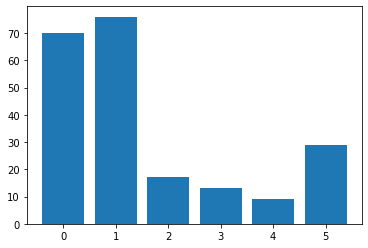

In [9]:
counter = Counter(label)
for k,v in counter.items():
	per = v / len(label) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=200 (16.667%)
Class=1, n=200 (16.667%)
Class=2, n=200 (16.667%)
Class=3, n=200 (16.667%)
Class=4, n=200 (16.667%)
Class=5, n=200 (16.667%)


/home/disorn/anaconda3/envs/ten2/lib/python3.7/site-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (200) in class 0 will be larger than the number of samples in the majority class (class #1.0 -> 76)
  n_samples_majority,
/home/disorn/anaconda3/envs/ten2/lib/python3.7/site-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (200) in class 1 will be larger than the number of samples in the majority class (class #1.0 -> 76)
  n_samples_majority,
/home/disorn/anaconda3/envs/ten2/lib/python3.7/site-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (200) in class 2 will be larger than the number of samples in the majority class (class #1.0 -> 76)
  n_samples_majority,
/home/disorn/anaconda3/envs/ten2/lib/python3.7/site-packages/imblearn/utils/_validation.py:326: UserWarning: After over-sampling, the number of samples (200) in class 3 will be l

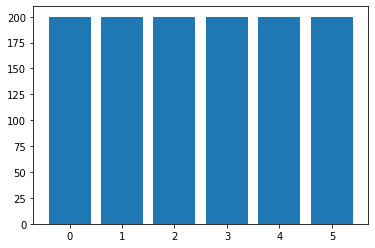

In [10]:
strategy = {0:200, 1:200, 2:200, 3:200, 4:200, 5:200}
oversample = SMOTE(sampling_strategy=strategy)
features, label = oversample.fit_resample(features, label)
counter = Counter(label)
for k,v in counter.items():
	per = v / len(label) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()
#type_dara = ds['TYPE']
#b = pd.get_dummies(type_dara)
# onehot = 

In [11]:
print(features.shape)
print(label.shape)

(1200, 9)
(1200,)


In [12]:
dataset = pd.DataFrame({"RI":features[:,0],
                        "NA2O":features[:,1],
                        "MGO":features[:,2],
                        "AL2O3":features[:,3],
                        "SIO2":features[:,4], 
                        "K2O":features[:,5], 
                        "CAO":features[:,6],
                        "BAO":features[:,7], 
                        "FE2O3":features[:,8],
                        "TYPE":label[:]})
train, test = train_test_split(dataset, test_size=0.3)
#train, val = train_test_split(train, test_size=0.14)
print(len(train), 'train examples')
#print(len(val), 'validation examples')
print(len(test), 'test examples')
a = train.values
features_train = a[:,0:9]
label_train = a[:,-1]
type_data = train['TYPE']
b = pd.get_dummies(type_data)
onehot = b.values

840 train examples
360 test examples


In [13]:
a1 = test.values
features_test = a1[:,0:9]
label_test = a1[:,-1]
type_data1 = test['TYPE']
b1 = pd.get_dummies(type_data1)
onehot_test = b1.values

In [14]:
dataset
train

,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE
637,1.517645,13.100045,3.457424,1.427469,72.369955,0.584463,8.892147,0.000000,0.000000,2.0
612,1.518823,13.643136,3.577629,0.862886,72.687629,0.144321,8.799064,0.102964,0.164742,2.0
1109,1.516837,14.682153,0.000000,1.983393,73.211958,0.000000,8.479282,1.576786,0.046248,5.0
1184,1.516050,14.918441,0.000000,2.435608,73.181616,0.021388,8.789943,0.592947,0.051502,5.0
624,1.518750,13.643577,3.582919,0.878757,72.692919,0.142117,8.786279,0.096351,0.154162,2.0
...,...,...,...,...,...,...,...,...,...,...
1185,1.516030,14.961778,0.000000,2.521481,73.053827,0.049235,8.849136,0.538420,0.000000,5.0
69,1.523000,13.310000,3.580000,0.820000,71.990000,0.120000,10.170000,0.000000,0.030000,0.0
725,1.518686,12.712893,0.000000,1.709640,73.793073,0.575487,11.079387,0.000000,0.000000,3.0
655,1.519880,13.119470,0.000000,1.733717,73.202035,0.448496,11.370177,0.000000,0.000000,3.0


In [15]:
onehot

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0]], dtype=uint8)

In [16]:
mm_scaler = preprocessing.MinMaxScaler()

In [17]:
features_train = mm_scaler.fit_transform(features_train)

In [18]:
model = tf.keras.models.Sequential([
#    tf.keras.layers.Dense(12, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
#    tf.keras.layers.Dense(11, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.001)),
#    tf.keras.layers.Dense(10,activation="relu"),
#    tf.keras.layers.Dense(9,activation="relu"),
#    tf.keras.layers.Dense(8,activation="relu"),
#    tf.keras.layers.Dense(7,activation="relu"),
#     tf.keras.layers.Dense(20,kernel_regularizer=tf.keras.regularizers.l2(0.0001),activation="relu"),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(16,kernel_regularizer=tf.keras.regularizers.l2(0.0001),activation="relu"),
#     tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(200,kernel_regularizer=tf.keras.regularizers.l2(0.0001),activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(170,kernel_regularizer=tf.keras.regularizers.l2(0.0001),activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(150,kernel_regularizer=tf.keras.regularizers.l2(0.0001),activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(100,kernel_regularizer=tf.keras.regularizers.l2(0.0001),activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(80,kernel_regularizer=tf.keras.regularizers.l2(0.0001),activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(50,kernel_regularizer=tf.keras.regularizers.l2(0.0001),activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(40,kernel_regularizer=tf.keras.regularizers.l2(0.0001),activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10,kernel_regularizer=tf.keras.regularizers.l2(0.0001),activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(6),
    tf.keras.layers.Softmax()

])

loss = tf.keras.losses.CategoricalCrossentropy()

model.compile(optimizer='adam',loss=loss)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='log')

In [19]:
model.fit(features_train, onehot,batch_size=40, epochs=1000,shuffle=True,callbacks=[tensorboard_callback])

Epoch 1/1000
21/21 [==============================] - 8s 365ms/step - loss: 1.8567
Epoch 2/1000
21/21 [==============================] - 0s 4ms/step - loss: 1.8102
Epoch 3/1000
21/21 [==============================] - 0s 4ms/step - loss: 1.6409
Epoch 4/1000
21/21 [==============================] - 0s 4ms/step - loss: 1.5238
Epoch 5/1000
21/21 [==============================] - 0s 4ms/step - loss: 1.4299
Epoch 6/1000
21/21 [==============================] - 0s 4ms/step - loss: 1.3870
Epoch 7/1000
21/21 [==============================] - 0s 4ms/step - loss: 1.3707
Epoch 8/1000
21/21 [==============================] - 0s 4ms/step - loss: 1.3274
Epoch 9/1000
21/21 [==============================] - 0s 4ms/step - loss: 1.2975
Epoch 10/1000
21/21 [==============================] - 0s 4ms/step - loss: 1.2729
Epoch 11/1000
21/21 [==============================] - 0s 4ms/step - loss: 1.2270
Epoch 12/1000
21/21 [==============================] - 0s 4ms/step - loss: 1.1487
Epoch 13/1000
21/21 [==

21/21 [==============================] - 0s 4ms/step - loss: 0.4885
Epoch 99/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.4829
Epoch 100/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.5048
Epoch 101/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.4895
Epoch 102/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.4825
Epoch 103/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.4962
Epoch 104/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.4866
Epoch 105/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.4894
Epoch 106/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.5029
Epoch 107/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.4871
Epoch 108/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.5050
Epoch 109/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.4854
Epoch 110/1000
21/21

21/21 [==============================] - 0s 4ms/step - loss: 0.3206
Epoch 197/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.3369
Epoch 198/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.3078
Epoch 199/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.3341
Epoch 200/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.3253
Epoch 201/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.3329
Epoch 202/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.3983
Epoch 203/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.3386
Epoch 204/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.3778
Epoch 205/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.3665
Epoch 206/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.3236
Epoch 207/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.3295
Epoch 208/1000
21/2

21/21 [==============================] - 0s 4ms/step - loss: 0.3532
Epoch 295/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2801
Epoch 296/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.3082
Epoch 297/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.3306
Epoch 298/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.3353
Epoch 299/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2779
Epoch 300/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2979
Epoch 301/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.3091
Epoch 302/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2743
Epoch 303/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2873
Epoch 304/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.3282
Epoch 305/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.3031
Epoch 306/1000
21/2

21/21 [==============================] - 0s 4ms/step - loss: 0.2521
Epoch 393/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2848
Epoch 394/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.3154
Epoch 395/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2769
Epoch 396/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2582
Epoch 397/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2551
Epoch 398/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2429
Epoch 399/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2351
Epoch 400/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2216
Epoch 401/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2440
Epoch 402/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2582
Epoch 403/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2646
Epoch 404/1000
21/2

21/21 [==============================] - 0s 4ms/step - loss: 0.2510
Epoch 491/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2097
Epoch 492/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2093
Epoch 493/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2103
Epoch 494/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2223
Epoch 495/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2337
Epoch 496/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2239
Epoch 497/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2075
Epoch 498/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1810
Epoch 499/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2142
Epoch 500/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2013
Epoch 501/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1976
Epoch 502/1000
21/2

21/21 [==============================] - 0s 4ms/step - loss: 0.1974
Epoch 589/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2128
Epoch 590/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2289
Epoch 591/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2017
Epoch 592/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2123
Epoch 593/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1914
Epoch 594/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1923
Epoch 595/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2014
Epoch 596/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2007
Epoch 597/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2136
Epoch 598/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2195
Epoch 599/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1952
Epoch 600/1000
21/2

21/21 [==============================] - 0s 4ms/step - loss: 0.2071
Epoch 687/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2070
Epoch 688/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2355
Epoch 689/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2351
Epoch 690/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2144
Epoch 691/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2113
Epoch 692/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2356
Epoch 693/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2037
Epoch 694/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1757
Epoch 695/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1862
Epoch 696/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1929
Epoch 697/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1997
Epoch 698/1000
21/2

21/21 [==============================] - 0s 4ms/step - loss: 0.1865
Epoch 785/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1858
Epoch 786/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1898
Epoch 787/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2339
Epoch 788/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2408
Epoch 789/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2187
Epoch 790/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2204
Epoch 791/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1883
Epoch 792/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1881
Epoch 793/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1971
Epoch 794/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1776
Epoch 795/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2137
Epoch 796/1000
21/2

21/21 [==============================] - 0s 4ms/step - loss: 0.1475
Epoch 883/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1745
Epoch 884/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1529
Epoch 885/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1528
Epoch 886/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1442
Epoch 887/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1684
Epoch 888/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1503
Epoch 889/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1857
Epoch 890/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1847
Epoch 891/1000
21/21 [==============================] - 0s 3ms/step - loss: 0.1717
Epoch 892/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1648
Epoch 893/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1716
Epoch 894/1000
21/2

21/21 [==============================] - 0s 4ms/step - loss: 0.1670
Epoch 981/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1659
Epoch 982/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1606
Epoch 983/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1457
Epoch 984/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1538
Epoch 985/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1843
Epoch 986/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1650
Epoch 987/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1697
Epoch 988/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1575
Epoch 989/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2225
Epoch 990/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.1963
Epoch 991/1000
21/21 [==============================] - 0s 4ms/step - loss: 0.2191
Epoch 992/1000
21/2

In [20]:
model.evaluate(features_train, onehot)

27/27 [==============================] - 0s 2ms/step - loss: 0.1034


0.10343309491872787

In [21]:
predict = model.predict(features_train)
# Calculate accuracy
out = np.argmax(predict,axis=1)
compare = out == label_train
accuracy = np.sum(compare) / 840.0*100.0
print(accuracy)

99.04761904761905


In [22]:
# a1 = test.values
# features_test = a1[:,0:9]
# label_test = a1[:,-1]
# type_data1 = test['TYPE']
# b1 = pd.get_dummies(type_data1)
# onehot_test = b1.values

In [23]:
features_test = mm_scaler.fit_transform(features_test)

In [24]:
predict_test = model.predict(features_test)
# Calculate accuracy
out1 = np.argmax(predict_test,axis=1)
compare1 = out1 == label_test
accuracy1 = np.sum(compare1) / 360 * 100
print(accuracy1)

82.5


In [25]:
label_train

array([2., 2., 5., 5., 2., 4., 1., 3., 1., 3., 2., 2., 2., 1., 4., 1., 1.,
       1., 1., 2., 1., 0., 2., 4., 5., 1., 1., 4., 4., 5., 3., 3., 1., 3.,
       2., 5., 0., 4., 3., 4., 3., 5., 5., 0., 4., 2., 1., 1., 5., 5., 2.,
       2., 2., 4., 3., 4., 0., 3., 2., 4., 3., 0., 3., 4., 2., 4., 2., 1.,
       4., 4., 4., 0., 5., 5., 1., 5., 0., 1., 2., 0., 5., 0., 0., 2., 4.,
       0., 4., 5., 5., 1., 2., 4., 1., 5., 5., 3., 5., 3., 4., 3., 1., 0.,
       1., 3., 1., 3., 2., 5., 1., 3., 2., 3., 2., 1., 4., 1., 0., 1., 1.,
       4., 0., 3., 1., 4., 3., 5., 1., 3., 5., 2., 2., 5., 0., 4., 2., 4.,
       5., 2., 3., 0., 5., 3., 5., 4., 4., 3., 5., 2., 1., 3., 2., 1., 5.,
       1., 3., 2., 3., 0., 2., 0., 5., 3., 2., 3., 3., 0., 4., 0., 0., 0.,
       1., 1., 3., 1., 4., 0., 4., 5., 1., 1., 3., 5., 3., 2., 4., 3., 3.,
       3., 2., 2., 3., 1., 4., 4., 4., 3., 5., 3., 2., 5., 5., 1., 4., 3.,
       2., 2., 5., 1., 0., 4., 0., 5., 0., 3., 0., 3., 4., 0., 5., 4., 2.,
       1., 5., 2., 5., 3.

In [26]:
out

array([2, 2, 5, 5, 2, 4, 1, 3, 1, 3, 2, 2, 2, 1, 4, 1, 1, 1, 1, 2, 1, 0,
       2, 4, 5, 1, 1, 4, 4, 5, 3, 3, 1, 3, 2, 5, 0, 4, 3, 4, 3, 5, 5, 0,
       4, 2, 1, 1, 5, 5, 2, 2, 2, 4, 3, 4, 0, 3, 2, 4, 3, 0, 3, 4, 2, 4,
       2, 1, 4, 4, 4, 0, 5, 5, 1, 5, 0, 1, 2, 0, 5, 0, 2, 2, 4, 0, 4, 5,
       5, 1, 2, 4, 1, 5, 5, 3, 5, 3, 4, 3, 1, 0, 1, 3, 1, 3, 2, 5, 1, 3,
       2, 3, 2, 1, 4, 1, 0, 1, 1, 4, 0, 3, 1, 4, 3, 5, 1, 3, 5, 2, 2, 5,
       0, 4, 2, 4, 5, 2, 3, 0, 5, 3, 5, 4, 4, 3, 5, 2, 1, 3, 2, 1, 5, 1,
       3, 2, 3, 0, 2, 0, 5, 3, 2, 3, 3, 0, 4, 0, 0, 0, 1, 1, 3, 1, 4, 0,
       4, 5, 1, 1, 3, 5, 3, 2, 4, 3, 3, 3, 2, 2, 3, 1, 4, 4, 4, 3, 5, 3,
       2, 5, 5, 1, 4, 3, 2, 2, 5, 1, 2, 4, 0, 5, 0, 3, 0, 3, 4, 0, 5, 4,
       2, 1, 5, 2, 5, 3, 2, 2, 4, 5, 5, 0, 3, 2, 0, 0, 5, 2, 0, 1, 2, 2,
       1, 2, 4, 3, 3, 4, 4, 1, 4, 0, 2, 2, 1, 1, 1, 2, 0, 1, 4, 1, 2, 3,
       0, 1, 2, 0, 5, 0, 3, 2, 0, 4, 1, 4, 3, 4, 1, 2, 1, 3, 1, 1, 3, 2,
       0, 2, 5, 1, 4, 1, 3, 5, 2, 5, 4, 5, 5, 1, 5,

In [27]:
np.sum(compare)

832

In [28]:
1200-360

840

In [29]:
120*100/840

14.285714285714286